In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set seeds for reproducibility
seed = 42  # or any number you like
random.seed(seed)
np.random.seed(seed)

# Task 1

### 1.a Splitting to train and test

In [4]:
df1 = pd.read_csv('class_1.csv', header=None)
df2 = pd.read_csv('class_2.csv', header=None)
df3 = pd.read_csv('class_3.csv', header=None)

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df1.columns = feature_names
df2.columns = feature_names
df3.columns = feature_names

classes = np.transpose([1, 2, 3])

df1['class'] = 1
df2['class'] = 2
df3['class'] = 3

train_df = pd.concat([df1.iloc[:30], df2.iloc[:30], df3.iloc[:30]], ignore_index=True)
test_df = pd.concat([df1.iloc[-20:], df2.iloc[-20:], df3.iloc[-20:]], ignore_index=True)

# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
# test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
train_df
#sns.pairplot(train_df)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
85,7.2,3.2,6.0,1.8,3
86,6.2,2.8,4.8,1.8,3
87,6.1,3.0,4.9,1.8,3
88,6.4,2.8,5.6,2.1,3


### 1.b Training a linear classifier

MSE result: 8.964687587394257
Accuracy result: 0.9666666666666667


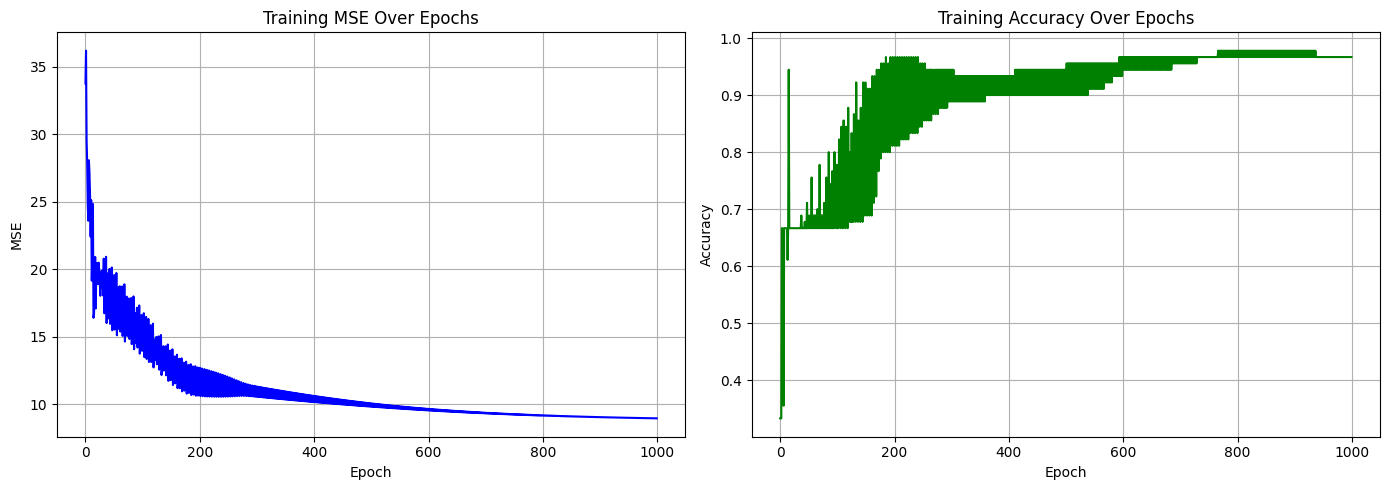

In [5]:
#Training the classifier using the train set

from logistic_regression import train_linear_classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X_train = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_train = train_df['class'].values

# Ensure y_train is a numpy array and reshaped to 2D
y_train = np.array(y_train).reshape(-1, 1)

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform
y_train_encoded = encoder.fit_transform(y_train)

num_iterations = 1000
W_train, mse_results, error_rates, train_accuracies, confusion_matrices_train = train_linear_classifier(X_train, y_train_encoded, max_iter=num_iterations, alpha=0.01)
epoch_list=np.arange(0, num_iterations, 1)
print(f"MSE result: {mse_results[-1]}")
print(f"Accuracy result: {train_accuracies[-1]}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MSE Plot
axs[0].plot(epoch_list, mse_results, color='blue')
axs[0].set_title("Training MSE Over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE")
axs[0].grid(True)

# Accuracy Plot
axs[1].plot(epoch_list, train_accuracies, color='green')
axs[1].set_title("Training Accuracy Over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)

plt.tight_layout()
plt.show()

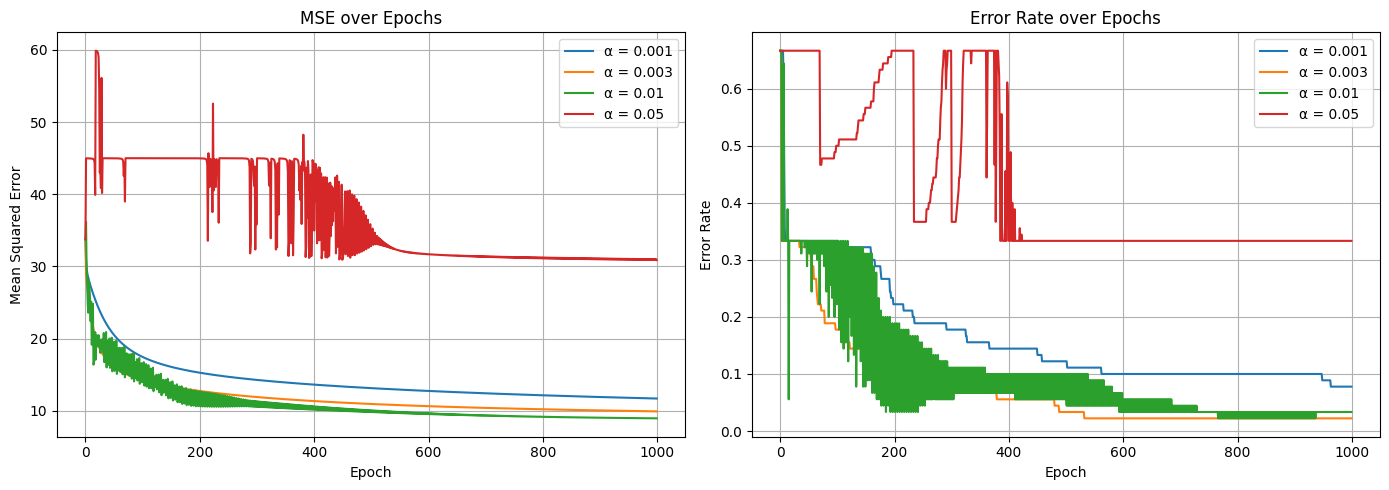

In [27]:
#Testing for different values of alpha

alphas = [0.001, 0.003, 0.01, 0.05]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for a in alphas:
    _, mse_results_a, error_rates_a, train_acc_a, _ = train_linear_classifier(X_train, y_train_encoded, max_iter=num_iterations, alpha=a)
    
    ax1.plot(epoch_list, mse_results_a, label=f"α = {a}")
    ax2.plot(epoch_list, error_rates_a, label=f"α = {a}")

# MSE subplot
ax1.set_title("MSE over Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Mean Squared Error")
ax1.grid(True)
ax1.legend()

# Error Rate subplot
ax2.set_title("Error Rate over Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Error Rate")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.savefig('Images/Diff_alpha')
plt.show()

In [7]:
#Predicting using the test set
from logistic_regression import predict

X_test = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = test_df['class'].values - 1

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
predictions = predict(X_test, W_train)

### 1.c Error rate

Average error rate: 0.09788888888888889
Last error rate for train data: 0.03333333333333333


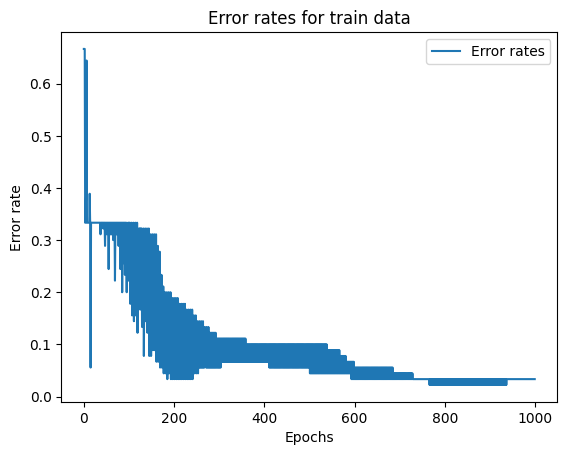

In [8]:
# Error rate for train data
avg_error_rate = np.mean(error_rates)
print(f"Average error rate: {avg_error_rate}")
print(f"Last error rate for train data: {error_rates[-1]}")
plt.plot(epoch_list, error_rates, label= "Error rates")
plt.plot()
plt.title('Error rates for train data')
plt.xlabel('Epochs')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [9]:
from logistic_regression import get_error_rate
# Error rate for test data

error_rate_test = get_error_rate(y_test, predictions)
print(error_rate_test)

0.05


### 1.c Confusion matrix with error rate

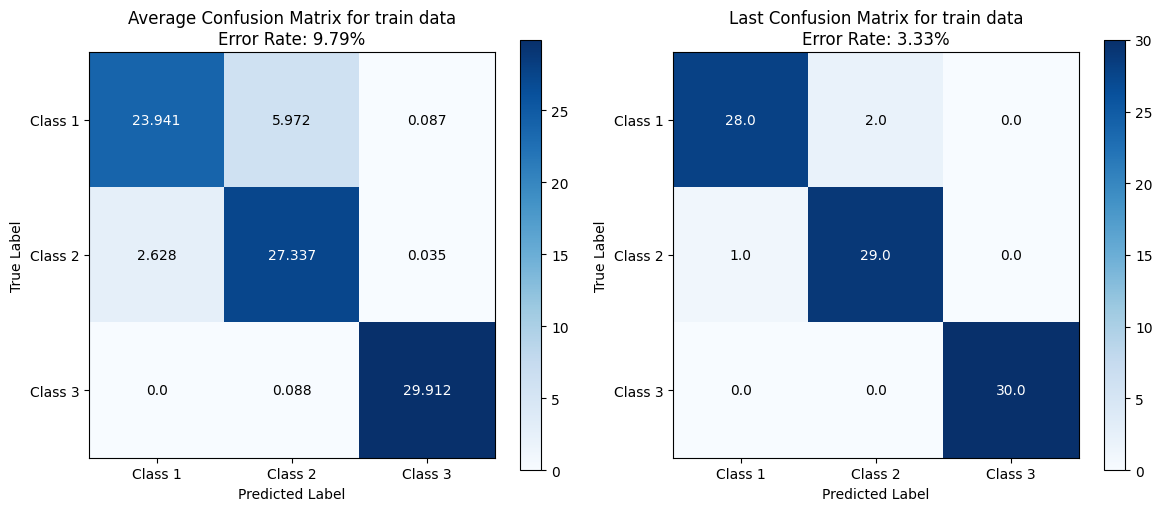

In [10]:
from confusion_matrix import get_confusion_matrix, plot_cm

avg_cm = sum(confusion_matrices_train) / num_iterations
class_names = ["Class 1", "Class 2", "Class 3"]
last_conf_matrix = confusion_matrices_train[-1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average confusion matrix for train data
plot_cm(avg_cm, class_names, title="Average Confusion Matrix for train data", ax=axes[0], error_rate=avg_error_rate)

# Confusion matrix for last iteration in training
plot_cm(last_conf_matrix, class_names, title="Last Confusion Matrix for train data", ax=axes[1], error_rate=error_rates[-1])

plt.tight_layout()
plt.savefig('Images/conf_matrix_train1c')
plt.show()

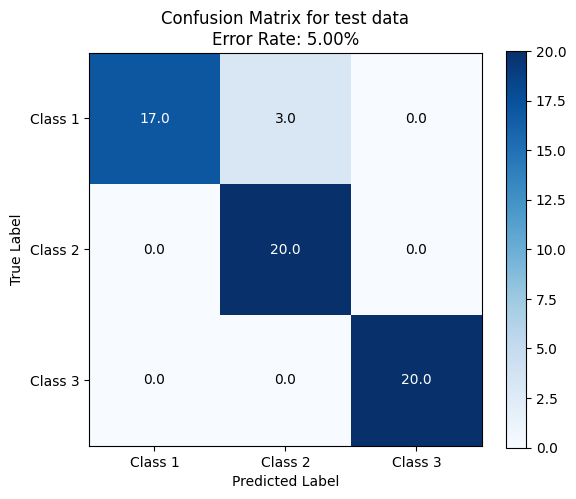

<Figure size 640x480 with 0 Axes>

In [11]:
# Confusion matrix for test data
conf_matrix_test = get_confusion_matrix(y_test, predictions)
plot_cm(conf_matrix_test, class_names, title="Confusion Matrix for test data", error_rate=error_rate_test)
plt.savefig('Images/conf_matrix_test1c')
plt.show()


### 1.d Switch train and test

Using the last 30 samples for training and the first 20 samples for testing

In [12]:
# Making new train and test data sets
train_df_new = pd.concat([df1.iloc[-30:], df2.iloc[-30:], df3.iloc[-30:]], ignore_index=True)
test_df_new = pd.concat([df1.iloc[:20], df2.iloc[:20], df3.iloc[:20]], ignore_index=True)

# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
# test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
train_df_new

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.4,3.4,1.7,0.2,1
1,5.1,3.7,1.5,0.4,1
2,4.6,3.6,1.0,0.2,1
3,5.1,3.3,1.7,0.5,1
4,4.8,3.4,1.9,0.2,1
...,...,...,...,...,...
85,6.7,3.0,5.2,2.3,3
86,6.3,2.5,5.0,1.9,3
87,6.5,3.0,5.2,2.0,3
88,6.2,3.4,5.4,2.3,3


MSE result: 9.22186398244154
Accuracy result: 0.9444444444444444


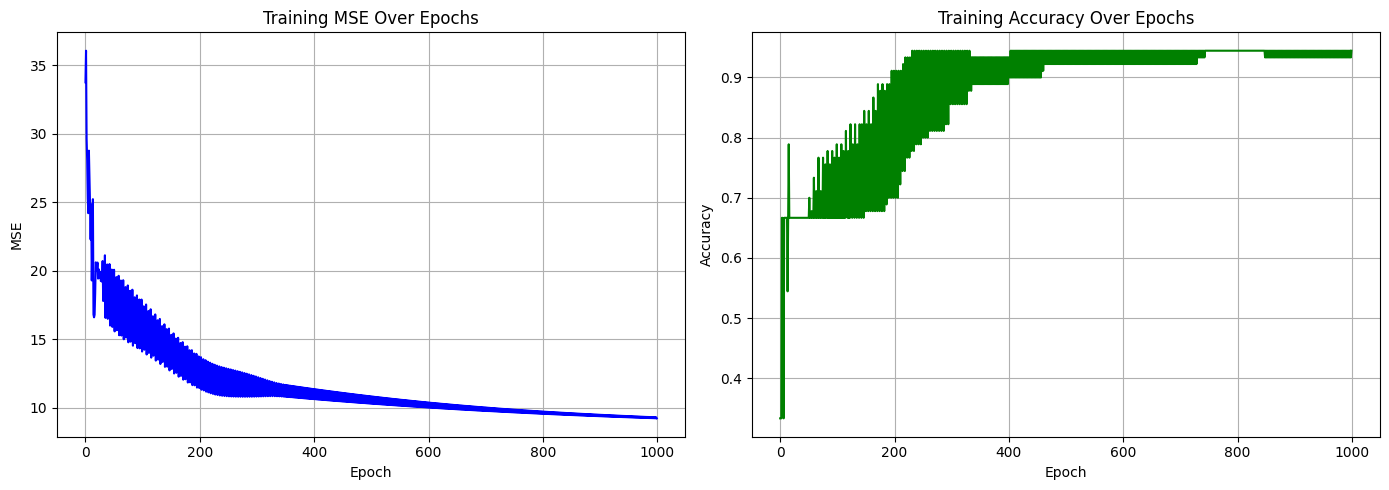

In [13]:
# Training the classifer

X_train_new = train_df_new[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_train_new = train_df_new['class'].values

# Ensure y_train is a numpy array and reshaped to 2D
y_train_new = np.array(y_train_new).reshape(-1, 1)

# Fit and transform
y_train_new_encoded = encoder.fit_transform(y_train_new)

W_train_new, mse_results_new, error_rates_new, train_accuracies_new, confusion_matrices_train_new = train_linear_classifier(X_train_new, y_train_new_encoded, max_iter=num_iterations, alpha=0.01)
print(f"MSE result: {mse_results_new[-1]}")
print(f"Accuracy result: {train_accuracies_new[-1]}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MSE Plot
axs[0].plot(epoch_list, mse_results_new, color='blue')
axs[0].set_title("Training MSE Over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE")
axs[0].grid(True)

# Accuracy Plot
axs[1].plot(epoch_list, train_accuracies_new, color='green')
axs[1].set_title("Training Accuracy Over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [14]:
#Predicting using the test set
from logistic_regression import predict

X_test_new = test_df_new[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test_new = test_df_new['class'].values - 1

y_test_new_encoded = encoder.fit_transform(y_test_new.reshape(-1, 1))
predictions_new = predict(X_test_new, W_train_new)

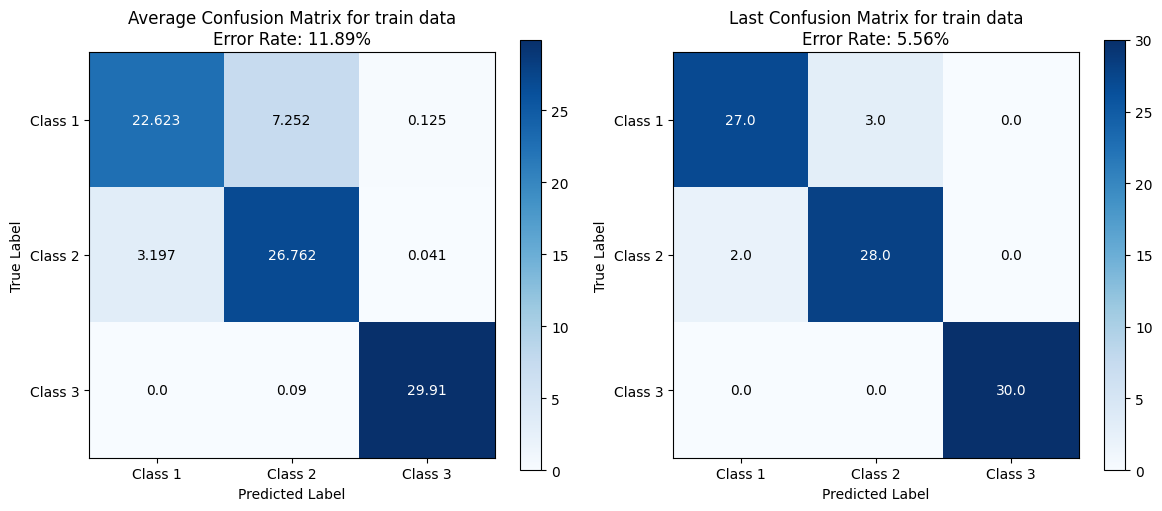

In [15]:
# Confusion matrix and error rate for train set

avg_cm_new = sum(confusion_matrices_train_new) / num_iterations
last_conf_matrix_new = confusion_matrices_train_new[-1]
avg_error_rate_new = np.mean(error_rates_new)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average confusion matrix for train data
plot_cm(avg_cm_new, class_names, title="Average Confusion Matrix for train data", ax=axes[0], error_rate=avg_error_rate_new)

# Confusion matrix for last iteration in training
plot_cm(last_conf_matrix_new, class_names, title="Last Confusion Matrix for train data", ax=axes[1], error_rate=error_rates_new[-1])

plt.tight_layout()
plt.savefig('Images/conf_matrix_train1d.png')
plt.show()

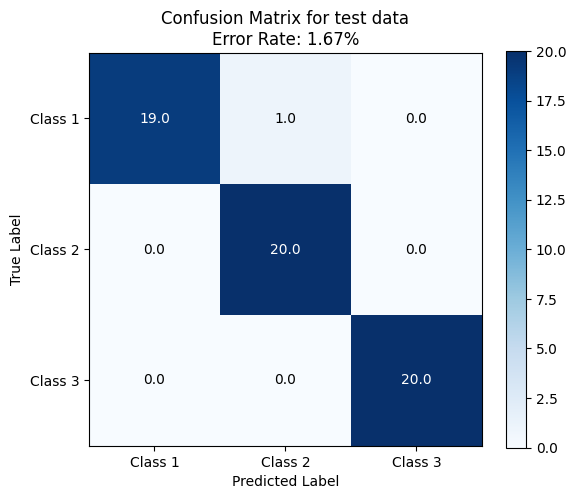

<Figure size 640x480 with 0 Axes>

In [16]:
# Confusion matrix for test data
error_rate_test_new = get_error_rate(y_test_new, predictions_new)
conf_matrix_test_new = get_confusion_matrix(y_test_new, predictions_new)
plot_cm(conf_matrix_test_new, class_names, title="Confusion Matrix for test data", error_rate=error_rate_test_new)
plt.savefig('Images/conf_matrix_test1d.png')
plt.show()

# Task 2

### 2.a Histograms

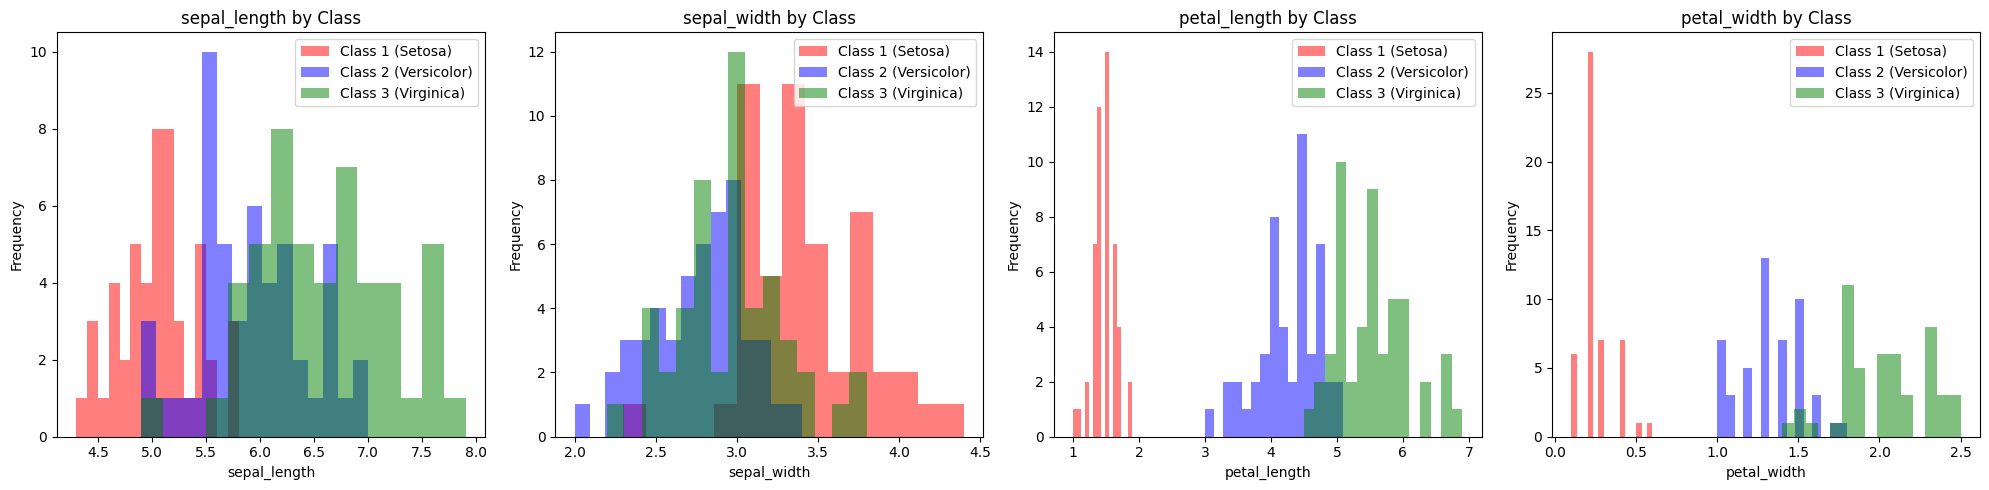

In [29]:
labels = ['Class 1 (Setosa)', 'Class 2 (Versicolor)', 'Class 3 (Virginica)']
colors = ['red', 'blue', 'green']
full_df = pd.concat([df1, df2, df3])

# Creating figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20,5))
dataframes = [df1, df2, df3]

for ax, feature in zip(axes, feature_names):
    for cls, col, label in zip(classes, colors, labels):
        subset = full_df[full_df['class'] == cls]
        ax.hist(subset[feature], bins=15, alpha=0.5, color=col, label=label)

    ax.set_title(f'{feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('Images/feature_hist')
plt.show()

Task: Remove feature that shows the most overlap between the classes. Train and test a classifier with the remaining three feature.

Can see the most overlap between classes for the feature sepal_width, so removing this feature.

In [18]:
# Removing the sepal_width feature

train_df_removed = train_df.drop(columns=["sepal_width"])
test_df_removed = test_df.drop(columns=["sepal_width"])

X_train_removed = train_df_removed[['sepal_length', 'petal_length', 'petal_width']].values
y_train_removed = train_df_removed['class'].values

# Ensure y_train is a numpy array and reshaped to 2D
y_train_removed = np.array(y_train_removed).reshape(-1, 1)

# Fit and transform
y_train_removed_encoded = encoder.fit_transform(y_train_removed)

W_train_removed, mse_results_removed, error_rates_removed, train_accuracies_removed, confusion_matrices_train_removed = train_linear_classifier(X_train_removed, y_train_removed_encoded, max_iter=num_iterations, alpha=0.01)

X_test_removed = test_df_removed[['sepal_length', 'petal_length', 'petal_width']].values
y_test_removed = test_df_removed['class'].values - 1

y_test_removed_encoded = encoder.fit_transform(y_test_removed.reshape(-1, 1))
predictions_removed = predict(X_test_removed, W_train_removed)

train_df_removed

,sepal_length,petal_length,petal_width,class
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1
...,...,...,...,...
85,7.2,6.0,1.8,3
86,6.2,4.8,1.8,3
87,6.1,4.9,1.8,3
88,6.4,5.6,2.1,3


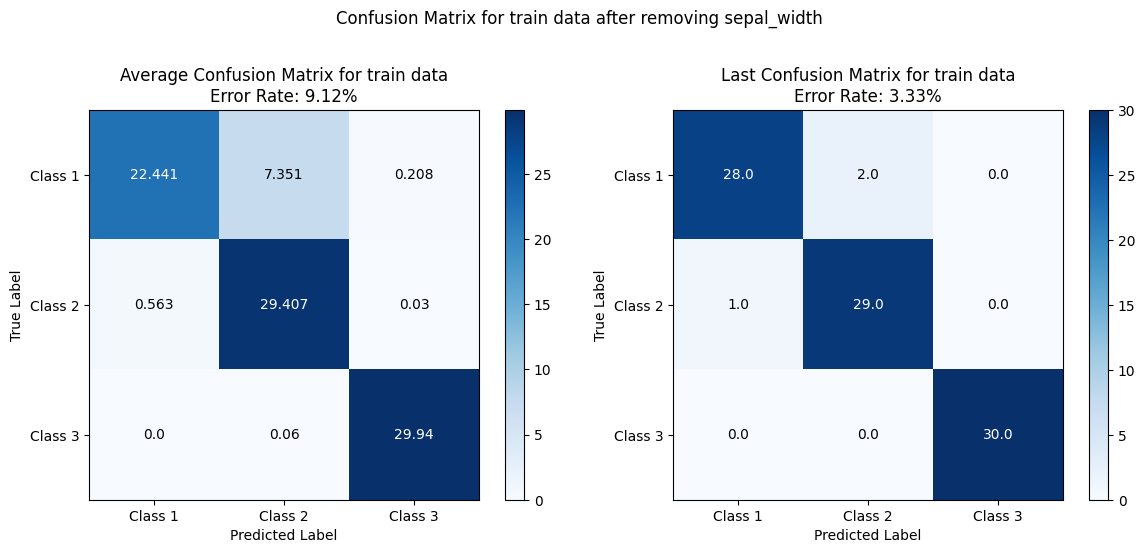

In [19]:
# Confusion matrix and error rate for train set

avg_cm_removed = sum(confusion_matrices_train_removed) / num_iterations
last_conf_matrix_removed = confusion_matrices_train_removed[-1]
avg_error_rate_removed = np.mean(error_rates_removed)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average confusion matrix for train data
plot_cm(avg_cm_removed, class_names, title="Average Confusion Matrix for train data", ax=axes[0], error_rate=avg_error_rate_removed)

# Confusion matrix for last iteration in training
plot_cm(last_conf_matrix_removed, class_names, title="Last Confusion Matrix for train data", ax=axes[1], error_rate=error_rates_removed[-1])

fig.suptitle('Confusion Matrix for train data after removing sepal_width', fontsize=12, y=1.05)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # push subplots down to make more room under suptitle
plt.savefig('Images/cm_train_sw_removed')
plt.show()

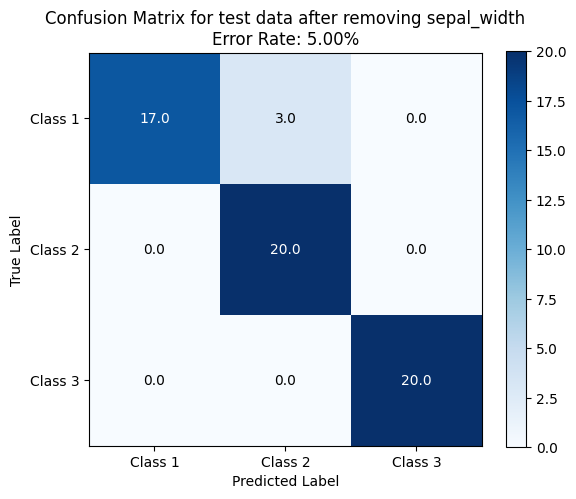

<Figure size 640x480 with 0 Axes>

In [20]:
# Confusion matrix for test data
error_rate_test_removed = get_error_rate(y_test_removed, predictions_removed)
conf_matrix_test_removed = get_confusion_matrix(y_test_removed, predictions_removed)
plot_cm(conf_matrix_test_removed, class_names, title="Confusion Matrix for test data after removing sepal_width", error_rate=error_rate_test_removed)
plt.savefig('Images/cm_test_sw_removed')
plt.show()


#### Removing both sepal_width and sepal_length

In [21]:
# Removing sepal_width and sepal_length
train_df_removed2 = train_df.drop(columns=["sepal_width", "sepal_length"])
test_df_removed2 = test_df.drop(columns=["sepal_width", "sepal_length"])

X_train_removed2 = train_df_removed2[['petal_length', 'petal_width']].values
y_train_removed2 = train_df_removed2['class'].values

# Ensure y_train is a numpy array and reshaped to 2D
y_train_removed2 = np.array(y_train_removed2).reshape(-1, 1)

# Fit and transform
y_train_removed_encoded2 = encoder.fit_transform(y_train_removed2)

W_train_removed2, mse_results_removed2, error_rates_removed2, train_accuracies_removed2, confusion_matrices_train_removed2 = train_linear_classifier(X_train_removed2, y_train_removed_encoded2, max_iter=num_iterations, alpha=0.01)

X_test_removed2 = test_df_removed2[['petal_length', 'petal_width']].values
y_test_removed2 = test_df_removed2['class'].values - 1

y_test_removed_encoded2 = encoder.fit_transform(y_test_removed2.reshape(-1, 1))
predictions_removed2 = predict(X_test_removed2, W_train_removed2)

train_df_removed2

,petal_length,petal_width,class
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
85,6.0,1.8,3
86,4.8,1.8,3
87,4.9,1.8,3
88,5.6,2.1,3


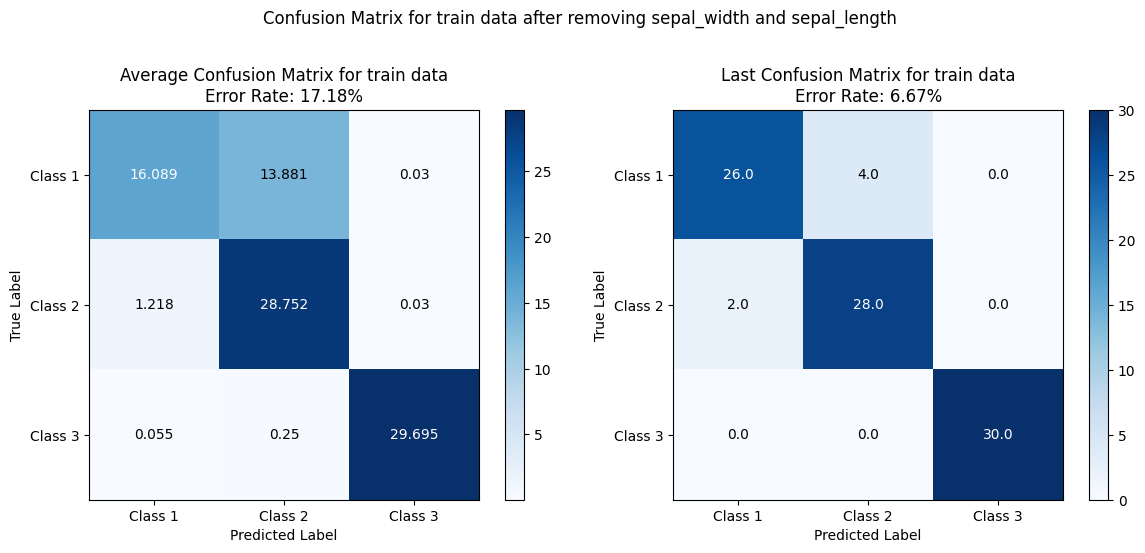

In [22]:
# Confusion matrix and error rate for train set

avg_cm_removed2 = sum(confusion_matrices_train_removed2) / num_iterations
last_conf_matrix_removed2 = confusion_matrices_train_removed2[-1]
avg_error_rate_removed2 = np.mean(error_rates_removed2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average confusion matrix for train data
plot_cm(avg_cm_removed2, class_names, title="Average Confusion Matrix for train data", ax=axes[0], error_rate=avg_error_rate_removed2)

# Confusion matrix for last iteration in training
plot_cm(last_conf_matrix_removed2, class_names, title="Last Confusion Matrix for train data", ax=axes[1], error_rate=error_rates_removed2[-1])

fig.suptitle('Confusion Matrix for train data after removing sepal_width and sepal_length', fontsize=12, y=1.05)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # push subplots down to make more room under suptitle
plt.savefig('Images/cm_train_swsl_removed')
plt.show()

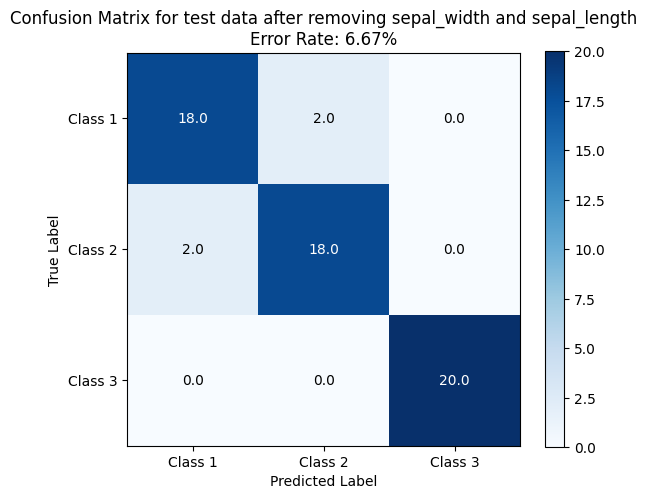

<Figure size 640x480 with 0 Axes>

In [23]:
# Confusion matrix for test data
error_rate_test_removed2 = get_error_rate(y_test_removed2, predictions_removed2)
conf_matrix_test_removed2 = get_confusion_matrix(y_test_removed2, predictions_removed2)
plot_cm(conf_matrix_test_removed2, class_names, title="Confusion Matrix for test data after removing sepal_width and sepal_length", error_rate=error_rate_test_removed2)
plt.savefig('Images/cm_test_swsl_removed')
plt.show()

#### Removing sepal_width, sepal_length and petal_length

In [24]:
# Removing sepal_width, sepal_length and petal_length
train_df_removed3 = train_df.drop(columns=["sepal_width", "sepal_length", "petal_length"])
test_df_removed3 = test_df.drop(columns=["sepal_width", "sepal_length", "petal_length"])

X_train_removed3 = train_df_removed3[['petal_width']].values
y_train_removed3 = train_df_removed3['class'].values

# Ensure y_train is a numpy array and reshaped to 2D
y_train_removed3 = np.array(y_train_removed3).reshape(-1, 1)

# Fit and transform
y_train_removed_encoded3 = encoder.fit_transform(y_train_removed3)

W_train_removed3, mse_results_removed3, error_rates_removed3, train_accuracies_removed3, confusion_matrices_train_removed3 = train_linear_classifier(X_train_removed3, y_train_removed_encoded3, max_iter=num_iterations, alpha=0.01)

X_test_removed3 = test_df_removed3[['petal_width']].values
y_test_removed3 = test_df_removed3['class'].values - 1

y_test_removed_encoded3 = encoder.fit_transform(y_test_removed3.reshape(-1, 1))
predictions_removed3 = predict(X_test_removed3, W_train_removed3)

train_df_removed3

,petal_width,class
0,0.2,1
1,0.2,1
2,0.2,1
3,0.2,1
4,0.2,1
...,...,...
85,1.8,3
86,1.8,3
87,1.8,3
88,2.1,3


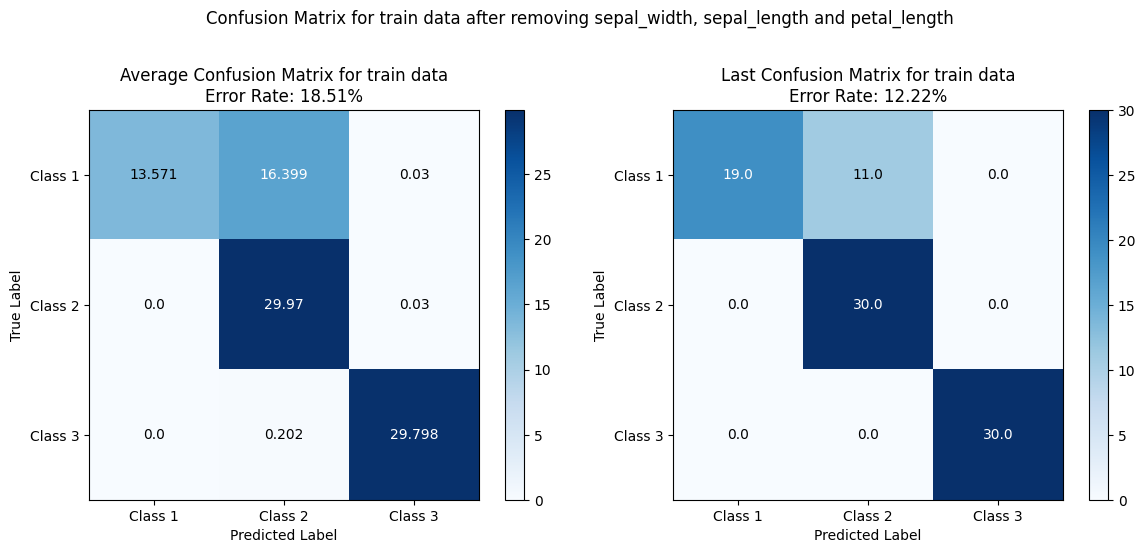

In [25]:
# Confusion matrix and error rate for train set

avg_cm_removed3 = sum(confusion_matrices_train_removed3) / num_iterations
last_conf_matrix_removed3 = confusion_matrices_train_removed3[-1]
avg_error_rate_removed3 = np.mean(error_rates_removed3)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Average confusion matrix for train data
plot_cm(avg_cm_removed3, class_names, title="Average Confusion Matrix for train data", ax=axes[0], error_rate=avg_error_rate_removed3)

# Confusion matrix for last iteration in training
plot_cm(last_conf_matrix_removed3, class_names, title="Last Confusion Matrix for train data", ax=axes[1], error_rate=error_rates_removed3[-1])

fig.suptitle('Confusion Matrix for train data after removing sepal_width, sepal_length and petal_length', fontsize=12, y=1.05)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # push subplots down to make more room under suptitle
plt.savefig('Images/cm_train_swslpl_removed')
plt.show()

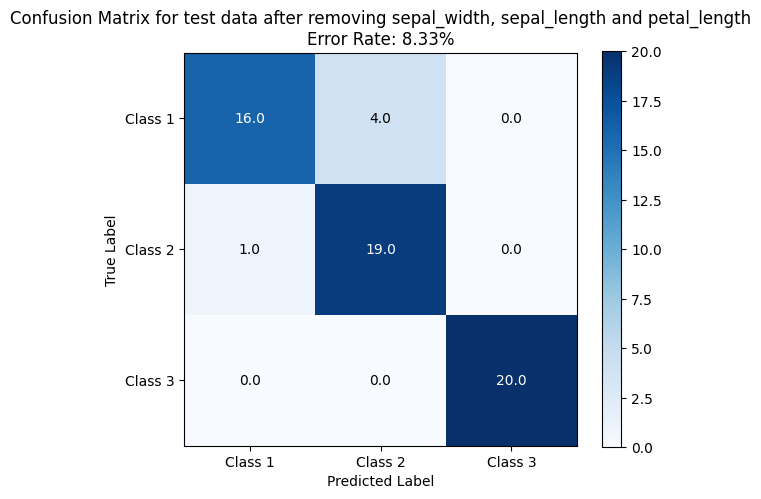

<Figure size 640x480 with 0 Axes>

In [26]:
# Confusion matrix for test data
error_rate_test_removed3 = get_error_rate(y_test_removed3, predictions_removed3)
conf_matrix_test_removed3 = get_confusion_matrix(y_test_removed3, predictions_removed3)
plot_cm(conf_matrix_test_removed3, class_names, title="Confusion Matrix for test data after removing sepal_width, sepal_length and petal_length", error_rate=error_rate_test_removed3)
plt.savefig('Images/cm_test_swslpl_removed')
plt.show()